In [2]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

In [4]:
x + y

array([10, 12, 14, 16, 18])

In [5]:
x - y

array([10, 10, 10, 10, 10])

In [9]:
np.array([[5, 6], [7, 8]])+\
np.array([[10, 20], [30, 40]]) -\
np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])

# 내적

In [10]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

In [20]:
(x.T @ y)

32

In [21]:
(x.T @ y)[0][0]

IndexError: invalid index to scalar variable.

In [18]:
np.dot(x.T, y)

IndexError: invalid index to scalar variable.

In [14]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x @ y

32

In [15]:
np.dot(x, y)

32

### 가중치

In [23]:
### 연습문제 2.2.1
# 3A, 4B, 5C = 3*100만원, 4*80만원, 5*50만원
# p = 가격, n = 수량

In [27]:
p = np.array([[100], [80], [50]])
n = np.array([[3], [4], [5]])

In [28]:
# 총 금액
p.T@n 

array([[870]])

In [30]:
(n.T @ p)[0][0]

870

### 가중평균


In [31]:
# numpy로 평균 계산하는 방법
x = np.arange(10)
N = len(x)

np.ones(N)@x / N

4.5

In [32]:
# 평균 계산 함수
x.mean()

4.5

### 유사도

In [19]:
from sklearn.datasets import load_digits

In [20]:
import matplotlib.gridspec as gridspec

In [36]:
digits = load_digits()

In [42]:
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

In [43]:
plt.figure(figsize = (9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1], width_ratios=[9,1,9,1,9,1,9,1])

<Figure size 648x648 with 0 Axes>

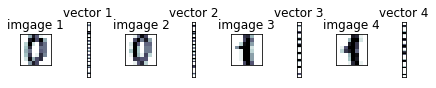

In [48]:
for i in range(4):
    plt.subplot(gs[2*i])
    plt.imshow(eval("d"+str(i+1)), aspect=1, interpolation ='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("imgage {}".format(i+1))
    plt.subplot(gs[2*i+1])
    plt.imshow(eval("v"+str(i+1)), aspect = 0.25, interpolation = 'nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i+1))
    
plt.tight_layout()
plt.show()

In [50]:
(v1.T @ v2)[0][0], (v3.T@v4)[0][0]

(3064.0, 3661.0)

In [51]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T@v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

In [52]:
### 연습문제 2.2.3
from sklearn.datasets import load_digits
X = load_digits().data

In [60]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [61]:
X[0, :]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [62]:
X[9, :]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [64]:
X[0, :]@X[9, :]

2807.0

### 선형회귀 모형

# 행렬과 행렬의 곱셉

In [66]:
### 연습 문제 2.2.4
# 1)
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

In [67]:
# 2)
D = B@A
D

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

#### 교환 법칙과 분배 법칙

In [7]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

In [8]:
A@B

array([[19, 22],
       [43, 50]])

In [9]:
B@A

array([[23, 34],
       [31, 46]])

In [10]:
A@(B+C)

array([[42, 42],
       [98, 98]])

In [11]:
A@B + A@C

array([[42, 42],
       [98, 98]])

In [12]:
(A+B) @ C

array([[110,  96],
       [174, 152]])

In [13]:
A@C + B@C

array([[110,  96],
       [174, 152]])

In [14]:
(A+B).T

array([[ 6, 10],
       [ 8, 12]])

In [15]:
A.T+B.T

array([[ 6, 10],
       [ 8, 12]])

In [16]:
(A@B).T

array([[19, 43],
       [22, 50]])

In [17]:
B.T@A.T

array([[19, 43],
       [22, 50]])

In [18]:
### 연습문제 2.2.5
# 1) 길이가 같은 일벡터와 행벡터 x의 곱은 행벡터 x를 반복하여 가지는 행렬과 같음 =

In [20]:
# 2) 행렬 X 가 있을 때, 이 행렬의 각 열의 평균으로 이루어진 벡터x가 다음과 같음을
#보여라

In [ ]:
# 3) 행렬X 는 동일한 벡터 x(전치)를 N개 누적하여 만든 행렬이다. 
# 즉, 각 열의 모든 값이 그 열의 평균으로 이루어진 행렬이다
# 이때 X가 다음과 같음을 보여라

In [11]:
# 4) 붓꽃 전체 데이터를 모두 벡터로 변환

from sklearn.datasets import load_iris
X = load_iris().data
N = X.shape[0]
N

150

In [9]:
ones = np.ones(N).reshape(-1, 1)
ones, len(ones)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [12]:
X_bar = ((ones @ ones.T) @ X)/N
X_bar[:5]

array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333]])

In [ ]:
#### 연습문제 2.2.6 

In [13]:
A = np.array([[1, 2]])
B = np.array([[1, 2], [3, 4]])
C = np.array([[5], [6]])

In [14]:
(A@B)@C

array([[95]])

In [15]:
A@(B@C)

array([[95]])

#### 항등행렬의 곱셈

In [23]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)

In [24]:
A@I

array([[1., 2.],
       [3., 4.]])

In [25]:
I@A

array([[1., 2.],
       [3., 4.]])

### 행렬의 곱 그 외 

#### 행렬과 벡터의 곱

#### 열 벡터의 선형조합

In [22]:
#### 기본세팅
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

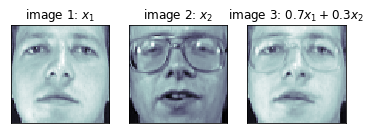

In [29]:
#### morphing

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7*faces.images[6] + 0.3*faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

#### 여러 개의 벡터에 대한 가중합 동시 계산

### 잔차

#### 잔차 제곱합

In [31]:
#### 연습 문제 2.2.10: 전치의 덧셈, 곱셈 배분 법칙

### 이차형식(Quardratic Form)

In [ ]:
#### 연습 문제 2.2.11(손으로 품)

In [32]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [37]:
x.T @ A @ x

228

In [ ]:
#### 연습문제 2.2.12